# Make Necessary Imports

In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

## Unpack Dataset

In [108]:
raw_data = load_breast_cancer()
features = raw_data.data
target = raw_data.target
feature_names = raw_data.feature_names
target_names = raw_data.target_names

print(raw_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## Organize the data in a dataframe

In [175]:
df = pd.DataFrame(
    data = features,
    columns = feature_names
)
df['target'] = target

# Data Preprocessing

In [176]:
df.shape

(569, 31)

### Check for Null Values

In [177]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# Exploratory Data Analysis

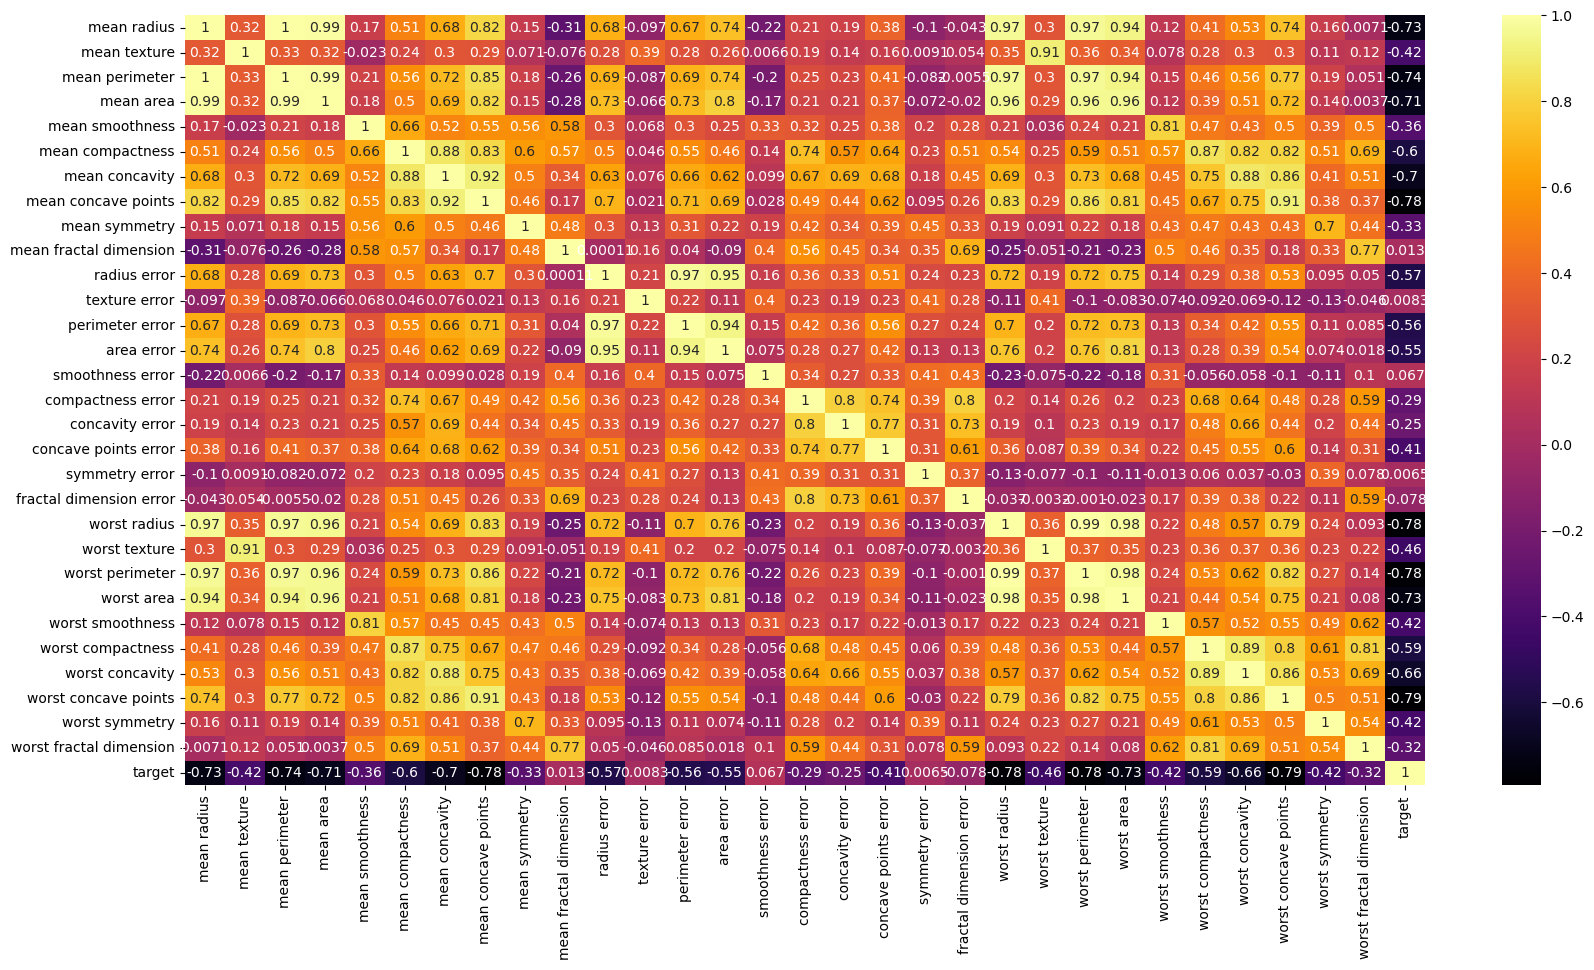

In [178]:
plt.figure(figsize=(20, 10))

sns.heatmap(
    df.corr(),
    annot=True,
    cmap='inferno'
)

plt.show()

> #### From the figure above: 
- The _**mean radius**_ and _**mean perimeter**_ features are highly correlated, which leads to multicolinearity. 

- The _**worst radius**_ and _**worst perimeter**_ features are highly correlated, which leads to multicolinearity

- One has to go in each case

In [179]:
df = df.drop(['mean perimeter', 'worst perimeter', 'perimeter error', 'mean area', 'worst area', 'worst radius'], axis = 1)

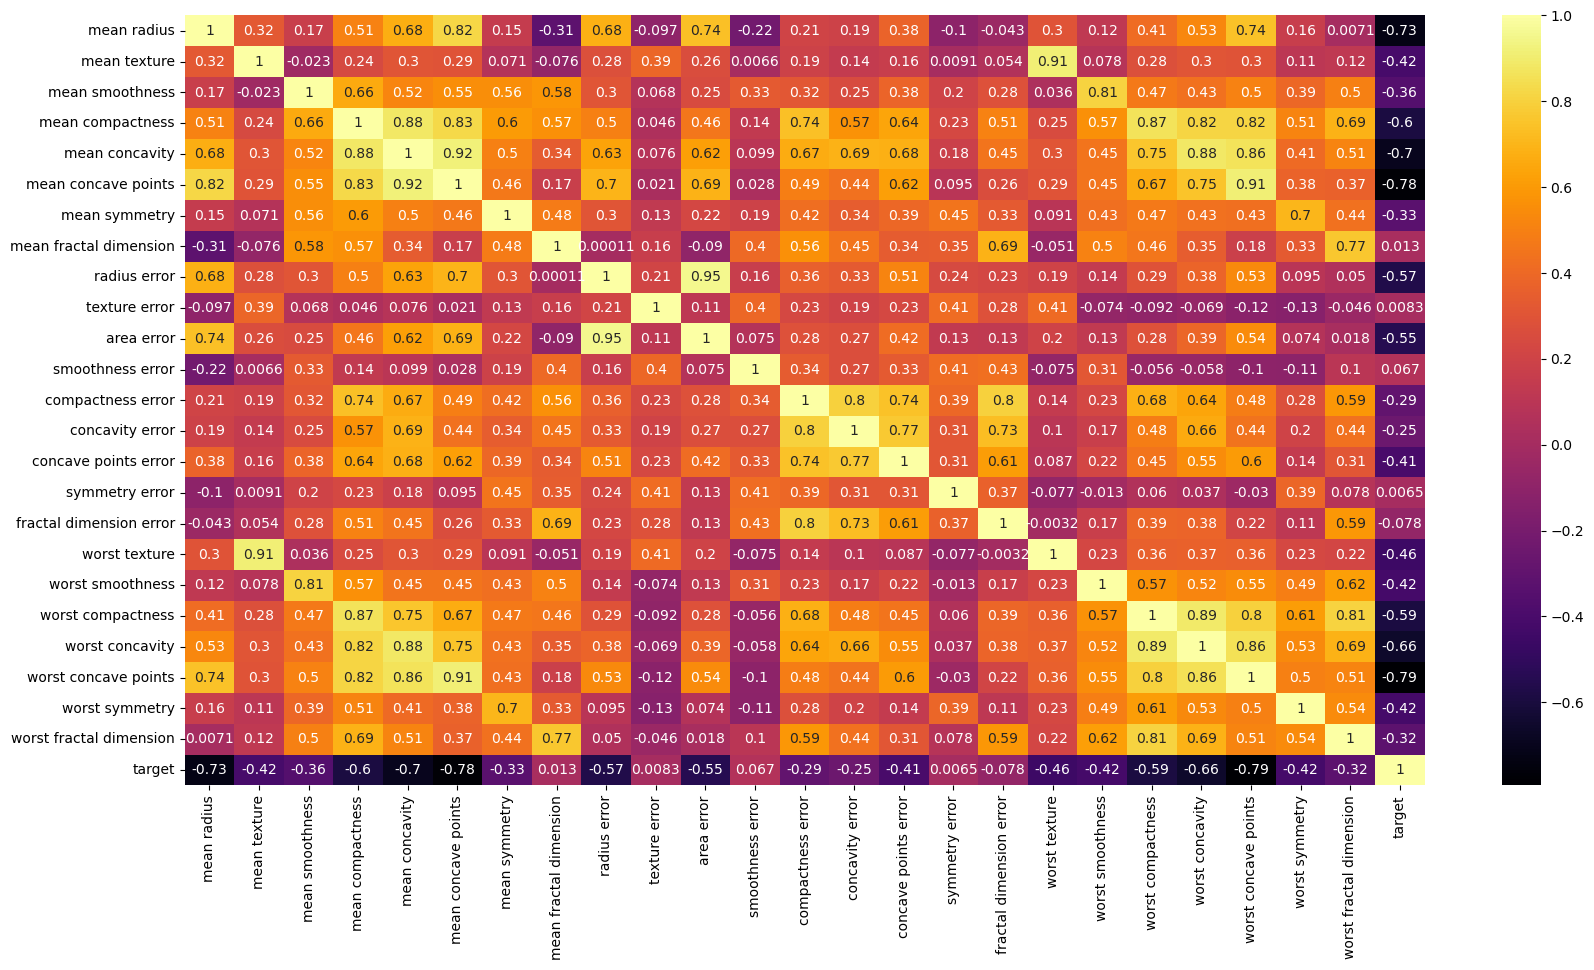

In [180]:
plt.figure(figsize=(20, 10))

sns.heatmap(
    df.corr(),
    annot=True,
    cmap='inferno'
)

plt.show()

In [182]:
df.shape

(569, 25)

## Split into Training and Testing Sets

In [183]:
X = df.drop(['target'], axis = 1)
y = df['target']

# y.value_counts(normalize = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = .2,
                                                   stratify = y,
                                                   random_state = 365)

# Using KNNs

## Perform Cross Validation

In [184]:
params = {
    'n_neighbors': np.arange(1, 21),
    'metric': ['euclidean', 'manhattan']
}

In [185]:
cv = GridSearchCV(KNeighborsClassifier(),
                  param_grid = params,
                  scoring = 'accuracy'
                 )

cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

## Initialize Model

In [11]:
knn = cv.best_estimator_
knn

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

## Make Predictions

In [12]:
y_test_pred = knn.predict(X_test)
y_test_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1])

## Model Evaluation

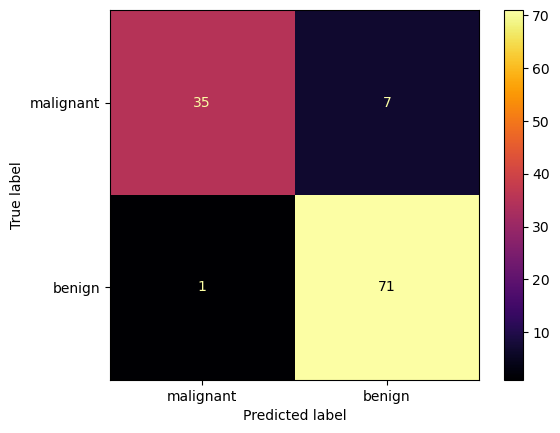

In [13]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred,
    cmap = 'inferno',
    display_labels = target_names
)

In [14]:
print(classification_report(
    y_test,
    y_test_pred,
    target_names = target_names
))

              precision    recall  f1-score   support

   malignant       0.97      0.83      0.90        42
      benign       0.91      0.99      0.95        72

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [15]:
print(accuracy_score(
    y_test,
    y_test_pred
))

0.9298245614035088


# Using Decision Trees

## Perform Cross Validation

In [68]:
dtc_params = {
    'ccp_alpha': [0.1, 0.01, 0.001, 0.0001]
}

In [81]:
dtc_cv = GridSearchCV(DecisionTreeClassifier(),
                      param_grid = dtc_params,
                      scoring = 'accuracy'
                      )

dtc_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [82]:
dtc = dtc_cv.best_estimator_

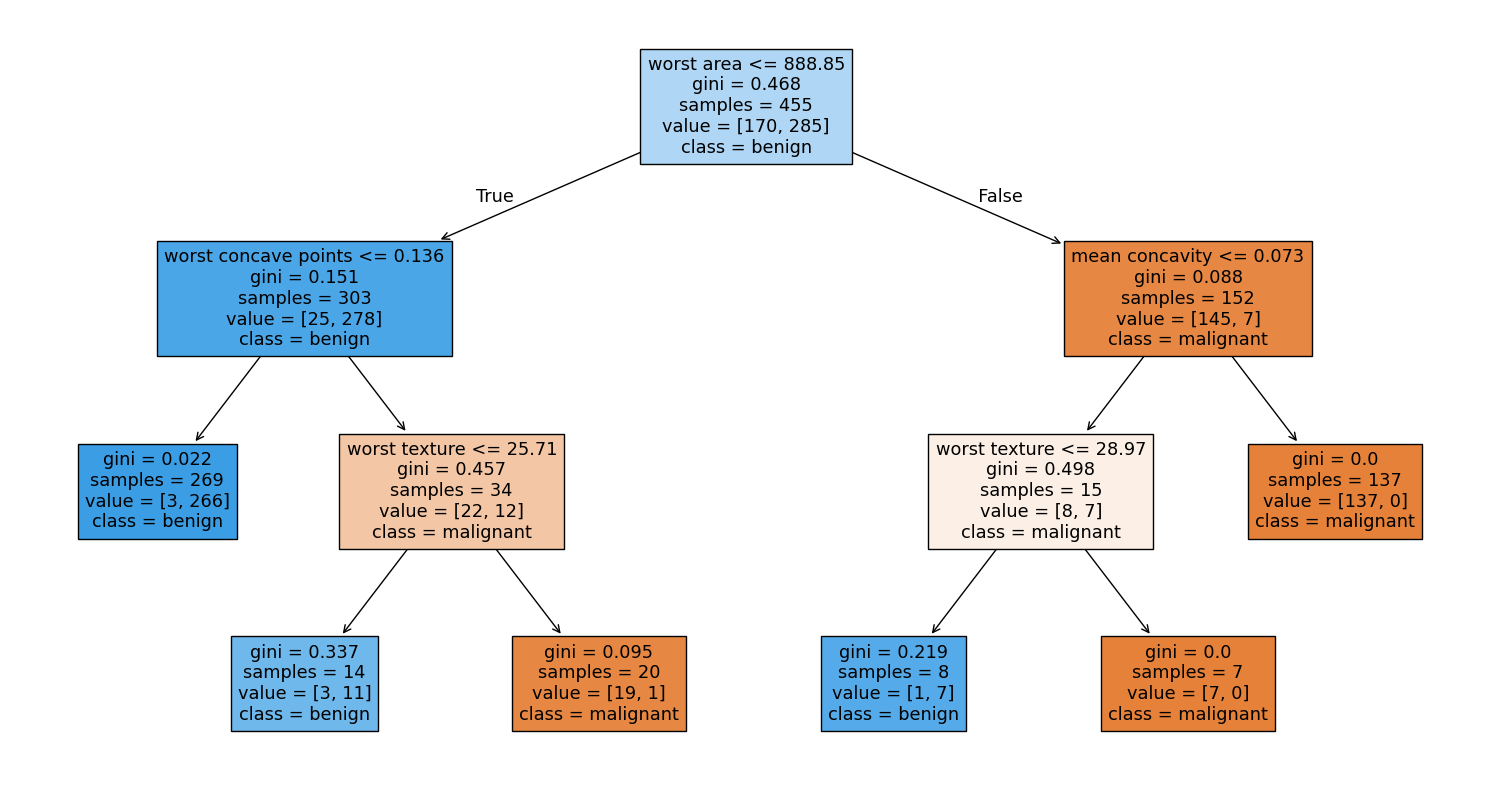

In [83]:
plt.figure(figsize = (19, 10))

plot_tree(dtc, feature_names = feature_names, class_names = target_names, filled=True)

plt.show()

In [90]:
dtc_y_test_pred = dtc.predict(X_test)
# dtc_y_test_pred

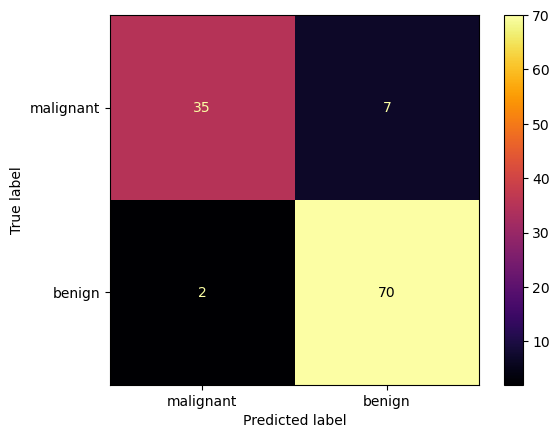

In [85]:
dtc_matrix = ConfusionMatrixDisplay.from_predictions(
    y_test,
    dtc_y_test_pred,
    display_labels = target_names,
    cmap = 'inferno'
)

In [86]:
print(classification_report(
    y_test,
    dtc_y_test_pred,
    target_names = target_names
))

              precision    recall  f1-score   support

   malignant       0.95      0.83      0.89        42
      benign       0.91      0.97      0.94        72

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [87]:
print(accuracy_score(
    y_test,
    dtc_y_test_pred
))

0.9210526315789473


# Using RandomForest

## Performing GridSearch

In [133]:
params = {
    'n_estimators': np.arange(1, 21, 1),
    'max_depth': np.arange(1, 21, 1),
}

In [134]:
rf_cv = GridSearchCV(RandomForestClassifier(),
                     param_grid=params,
                     scoring='accuracy',
                     )

rf_cv.fit(X_train, y_train)

C:\Users\harri\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

In [135]:
# rf_clf = RandomForestClassifier()
# rf_clf.fit(X_train, y_train)
rf_clf = rf_cv.best_estimator_

In [136]:
rf_y_test_pred = rf_clf.predict(X_test)

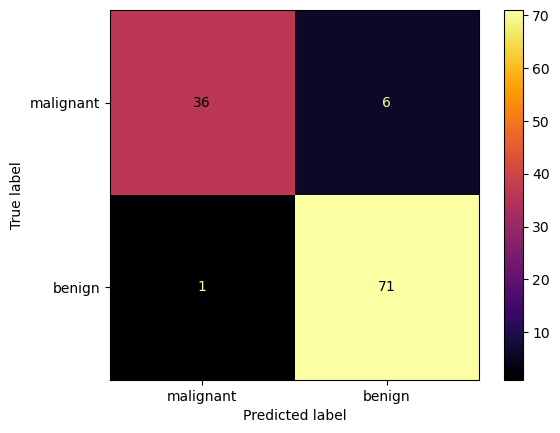

In [137]:
rf_matrix = ConfusionMatrixDisplay.from_predictions(
    y_test,
    rf_y_test_pred,
    display_labels = target_names,
    cmap = 'inferno'
)

In [138]:
print(classification_report(
    y_test,
    rf_y_test_pred,
    target_names=target_names
))

              precision    recall  f1-score   support

   malignant       0.97      0.86      0.91        42
      benign       0.92      0.99      0.95        72

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [139]:
print(accuracy_score(
    y_test,
    rf_y_test_pred
))

0.9385964912280702


Using a Random Forest Model yields an accuracy of ~96%

This is the best so far

# Using Gaussian Naive Bayes

In [ ]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [101]:
gnb_y_test_pred = gnb_clf.predict(X_test)

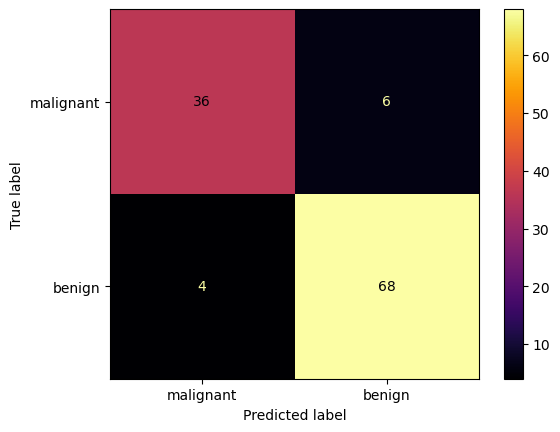

In [102]:
gnb_matrix = ConfusionMatrixDisplay.from_predictions(
    y_test,
    gnb_y_test_pred,
    display_labels = target_names,
    cmap = 'inferno'
)

In [104]:
print(classification_report(
    y_test,
    gnb_y_test_pred,
    target_names=target_names
))

              precision    recall  f1-score   support

   malignant       0.90      0.86      0.88        42
      benign       0.92      0.94      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



In [103]:
print(accuracy_score(
    y_test,
    gnb_y_test_pred
))

0.9122807017543859
